In [1]:
using Distributions, Turing
using Gadfly

In [2]:
@model gdemo(x) = begin
  s ~ InverseGamma(2,3)
  m ~ Normal(0,sqrt(s))
  x[1] ~ Normal(m, sqrt(s))
  x[2] ~ Normal(m, sqrt(s))
  return s, m
end

 Assume - `s` is a parameter
 Assume - `m` is a parameter
 Observe - `x` is an observation


gdemo (generic function with 4 methods)

In [3]:
s = @sample(gdemo([1.5, 2]), HMC(1000, 0.25, 5));

[HMC]: Finshed with accept rate = 0.978 within 4.861634969711304 seconds


In [4]:
describe(s)

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
    Mean       SD       Naive SE      MCSE       ESS   
m 1.108792 0.84573303 0.026744427 0.055340876 233.54712
s 2.042740 1.76139566 0.055700222 0.091967058 366.81684

Quantiles:
      2.5%       25.0%     50.0%     75.0%     97.5%  
m -0.53868102 0.60340745 1.1605049 1.6013641 2.8658677
s  0.55874476 1.03688898 1.5591432 2.3188787 6.7473047



In [5]:
p = plot(s);

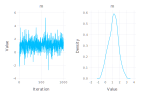

In [6]:
hstack(p[1:2])

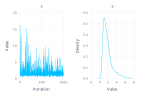

In [7]:
hstack(p[3:4])

In [8]:
heideldiag(s)

  Burn-in Stationarity p-value    Mean    Halfwidth Test
m       0            1  0.1576 1.1087920 0.08679187    1
s     100            1  0.0571 1.9936758 0.12861911    1

